In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Import and checking data integrity


In [10]:
emp = pd.read_csv('employee Data.csv')
store = pd.read_csv('Store level data.csv')

In [11]:
print(emp.columns,emp.shape)
print(store.columns,store.shape)

Index(['store_id', 'year', 'month', 'population', 'location_code', 'id', 'age',
       'gender', 'race', 'marital_status', 'education', 'division', 'tenure',
       'training_status', 'jlevel', 'salary', 'absent', 'turnover',
       'persuasion_skills', 'commitment', 'respect', 'development', 'goal',
       'perf_feedback', 'perf_fair', 'reward_fair', 'work_life', 'competition',
       'culture_fit', 'extraversion', 'conscientiousness', 'emotion_stability',
       'agreeable', 'openness', 'cognitive_ability', 'structured_interview',
       'business_rating', 'behavior_rating', 'sales_skills'],
      dtype='object') (8798, 39)
Index(['store_id', 'locnearestformat', 'locnearestany', 'locimargintarget',
       'locimarginactual', 'locomargintarget', 'locomarginactual',
       'locrevenuetarget', 'locrevenueactual', 'Unnamed: 9',
       'locgmargintarget', 'locgmarginactual', 'locexpensetarget',
       'locexpenseactual', 'locebitdatarget', 'locebitdaactual', 'minwage',
       'unemployed'

In [12]:
#Add date coulmns
store['date'] = pd.to_datetime(store[['year', 'month']].assign(DAY=1))
emp['date'] = pd.to_datetime(emp[['year', 'month']].assign(DAY=1))

In [13]:
#check missing values 
sum(emp.isnull().sum())
sum(store.isnull().sum())

5910

In [14]:
#invsitigate missing values in store
store.isnull().sum()

store_id                 0
locnearestformat         0
locnearestany            0
locimargintarget         0
locimarginactual         0
locomargintarget         0
locomarginactual         0
locrevenuetarget         0
locrevenueactual         0
Unnamed: 9            5910
locgmargintarget         0
locgmarginactual         0
locexpensetarget         0
locexpenseactual         0
locebitdatarget          0
locebitdaactual          0
minwage                  0
unemployed               0
edu14                    0
year                     0
month                    0
yrmo                     0
population               0
Voluntary_turnover       0
Layoff                   0
Hiring                   0
unitmonth_female         0
unitmonth_ftpt           0
unitmonth_hrlyrate       0
unitmonth_white          0
tenure                   0
rmgrwhite                0
rmgrfemale               0
date                     0
dtype: int64

In [15]:
#no relevant information in the column 'Unnamed: 9' so we can drop it
del store['Unnamed: 9']

## Turnover Rate Discovery 

In [16]:
# 1. How people are likely to leave the company?
emp.turnover.value_counts().sort_index()

turnover
1    1568
2    2348
3    2510
4    1663
5     709
Name: count, dtype: int64

<Axes: title={'center': 'Voluntary Turnover over time'}, xlabel='Date', ylabel='Avg. Voluntary Turnover Rate%'>

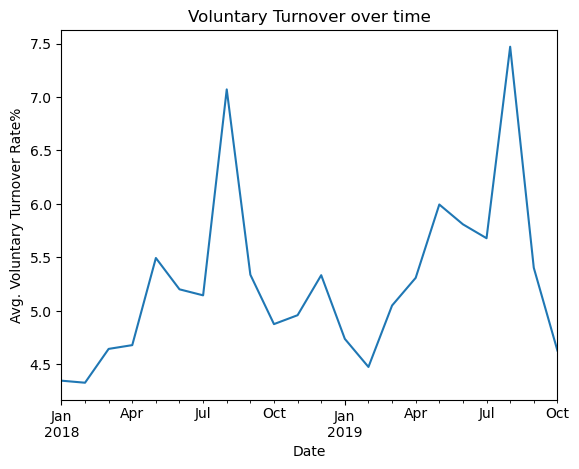

In [17]:
# 2. Voluntary Turnover Rate Over Time
store.groupby(['date']).mean()['Voluntary_turnover'].plot(xlabel='Date',ylabel='Avg. Voluntary Turnover Rate%',title='Voluntary Turnover over time')

In [18]:
#for better visualization in PowerPoint I exported rawdata
pd.DataFrame(store.groupby(['date']).mean()['Voluntary_turnover']).to_csv('Voluntary_turnover.csv')

## Correlation - possible connection between these factors

In [30]:
corr_emp = emp[['age', 'gender', 'race', 'education', 'division', 'tenure',
 'training_status', 'jlevel', 'salary', 'absent', 'commitment', 'respect',
  'development', 'goal', 'perf_feedback', 'perf_fair', 'reward_fair', 'work_life',
   'competition', 'culture_fit', 'persuasion_skills', 'extraversion',
    'conscientiousness', 'emotion_stability', 'agreeable', 'openness',
     'cognitive_ability', 'structured_interview', 'sales_skills', 
]]

In [31]:
#convert categorical columns to numerical
print('Categorical columns: ')
for col in corr_emp.columns:
    if corr_emp[col].dtype == 'object':
        values = corr_emp[col].value_counts()
        values = dict(values)
        
        print(str(col))
        label = LabelEncoder()
        label = label.fit(corr_emp[col])
        corr_emp[col] = label.transform(corr_emp[col].astype(str))
        
        new_values = corr_emp[col].value_counts()
        new_values = dict(new_values)
        
        value_dict = {}
        i=0
        for key in values:
            value_dict[key] = list(new_values)[i]
            i+= 1
        print(value_dict)

Categorical columns: 
gender
{'Male': 1, 'Female': 0}
race
{'W': 1, 'NW': 0}
education
{'Some college': 2, 'Post-secondary degree': 1, 'High school diploma or equivalent': 0, 'Some high school': 3}
division
{'Computer & Electronics': 1, 'Office Products': 3, 'Home Appliances': 2, 'Cellphones and Accessories': 0}
training_status
{'Y': 1, 'N': 0}


In [ ]:
#correlation heatmap (hover over the heatmap to see the exact correlated factors and values)
df_corr = corr_emp.corr()
fig = px.imshow(df_corr)
fig.show()

## Equity Mapping

In [ ]:
store['rmgrwhite_n'] = 1- store['rmgrwhite']
store['unitmonth_white_n'] = 1- store['unitmonth_white']

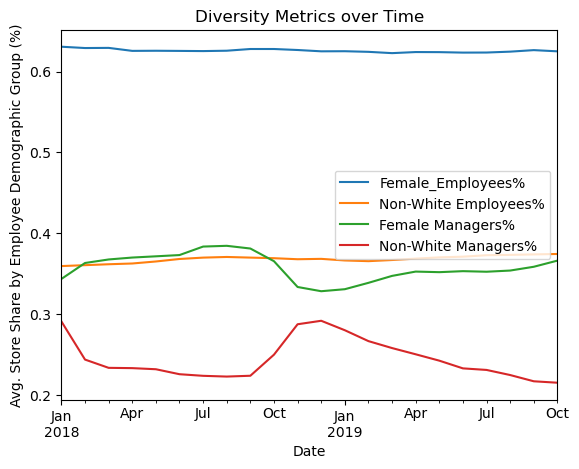

In [ ]:
ax = store.groupby(['date']).mean()[['unitmonth_female', 'unitmonth_white_n', 'rmgrfemale', 'rmgrwhite_n']].plot(xlabel='Date',ylabel='Avg. Store Share by Employee Demographic Group (%)',title='Diversity Metrics over Time')
ax.legend(['Female_Employees%','Non-White Employees%','Female Managers%','Non-White Managers%'])

## Payment Equity - Visualization and T-test

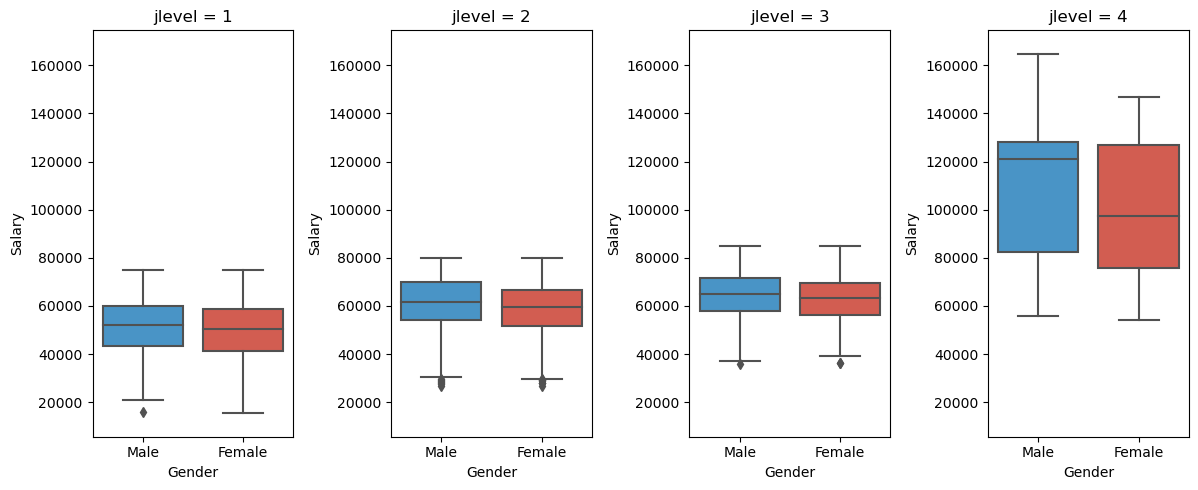

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 5))
palette = {'Male': '#3498db', 'Female': '#e74c3c'}
order = ['Male', 'Female']
# Flatten the axes array for easy iteration
axes = axes.flatten()
# Initialize y-axis limits
y_min = float('inf')
y_max = float('-inf')
# Iterate through each jlevel and plot a boxplot in a subplot
for i, jlevel_value in enumerate(sorted(emp['jlevel'].unique())):
    emp_df = emp[emp['jlevel'] == jlevel_value]
    sns.boxplot(x='gender', y='salary', data=emp_df, ax=axes[i], palette=palette, order=order)
    axes[i].set_title(f'jlevel = {jlevel_value}')
    axes[i].set_xlabel('Gender')
    axes[i].set_ylabel('Salary')
    # Update y-axis limits based on the current subplot data
    y_min = min(y_min, emp_df['salary'].min()-10000)
    y_max = max(y_max, emp_df['salary'].max()+10000)
    
# Adjust layout
plt.tight_layout()
# Set common y-axis limits for all subplots
for ax in axes:
    ax.set_ylim(y_min, y_max)

# Show the plot
plt.show()


In [ ]:
for j,group in emp.groupby('jlevel'):
    print("when job level = ",j)
    # Separate male and female salary data
    male_salaries = group[group['gender'] == 'Male']['salary']
    female_salaries = group[group['gender'] == 'Female']['salary']

    # Perform t-test
    t_stat, p_val = stats.ttest_ind(male_salaries, female_salaries)

    # Print results
    print("t-statistic:", round(t_stat, 3))
    print("p-value:", p_val)

    # Determine whether there is a significant difference based on the p-value
    if p_val < 0.05:
        print("There is a significant difference in salary between male and female employees.")
    else:
        print("There is no significant difference in salary between male and female employees.")
    

when job level =  1
t-statistic: 4.106
p-value: 4.1131381885646664e-05
There is a significant difference in salary between male and female employees.
when job level =  2
t-statistic: 5.619
p-value: 2.140756986742323e-08
There is a significant difference in salary between male and female employees.
when job level =  3
t-statistic: 2.562
p-value: 0.010562113581919315
There is a significant difference in salary between male and female employees.
when job level =  4
t-statistic: 3.061
p-value: 0.002253243094204384
There is a significant difference in salary between male and female employees.


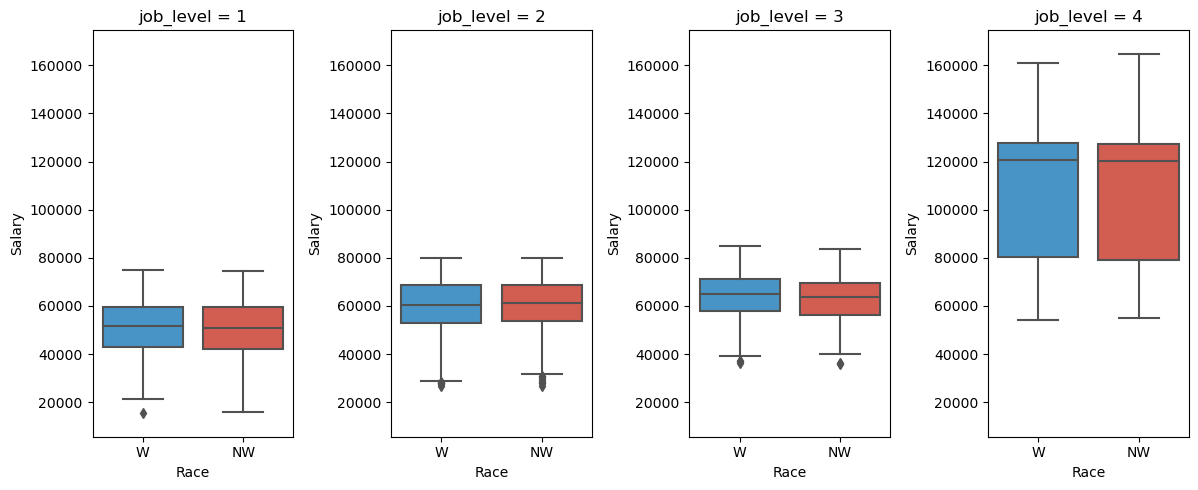

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 5))
palette = {'W': '#3498db', 'NW': '#e74c3c'}
order = ['W', 'NW']
# Flatten the axes array for easy iteration
axes = axes.flatten()
# Initialize y-axis limits
y_min = float('inf')
y_max = float('-inf')
# Iterate through each jlevel and plot a boxplot in a subplot
for i, jlevel_value in enumerate(sorted(emp['jlevel'].unique())):
    emp_df = emp[emp['jlevel'] == jlevel_value]
    sns.boxplot(x='race', y='salary', data=emp_df, ax=axes[i], palette=palette, order=order)
    axes[i].set_title(f'job_level = {jlevel_value}')
    axes[i].set_xlabel('Race')
    axes[i].set_ylabel('Salary')
    # Update y-axis limits based on the current subplot data
    y_min = min(y_min, emp_df['salary'].min()-10000)
    y_max = max(y_max, emp_df['salary'].max()+10000)
    
# Adjust layout
plt.tight_layout()
# Set common y-axis limits for all subplots
for ax in axes:
    ax.set_ylim(y_min, y_max)

# Show the plot
plt.show()


In [ ]:
for j,group in emp.groupby('jlevel'):
    print("when job level = ",j)
    # Separate male and female salary data
    w_salaries = group[group['race'] == 'W']['salary']
    non_w_salaries = group[group['race'] == 'NW']['salary']

    # Perform t-test
    t_stat, p_val = stats.ttest_ind(w_salaries, non_w_salaries)

    # Print results
    print("t-statistic:", round(t_stat, 3))
    print("p-value:", p_val)

    # Determine whether there is a significant difference based on the p-value
    if p_val < 0.05:
        print("There is a significant difference in salary between white and non-white employees.")
    else:
        print("There is no significant difference in salary between white and non-white employees.")
    

when job level =  1
t-statistic: 1.768
p-value: 0.0770586277321406
There is no significant difference in salary between white and non-white employees.
when job level =  2
t-statistic: -0.8
p-value: 0.4239146030746467
There is no significant difference in salary between white and non-white employees.
when job level =  3
t-statistic: 1.582
p-value: 0.11408725244904637
There is no significant difference in salary between white and non-white employees.
when job level =  4
t-statistic: 0.807
p-value: 0.41991634789591803
There is no significant difference in salary between white and non-white employees.
